<a href="https://colab.research.google.com/github/gioma68/ai-and-ml-samples/blob/main/test_tensor_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Esercizio 1 - Rete Neuronale a 3 livelli per la classificazione di un dataset relativo a dati sui tumori al seno con librerie TensorFlow**

Imposto librerie TensorFlow + numpy + sckit-learn

In [ ]:
import tensorflow as tf
from tensorflow import keras as k
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

uso dataset di dati su cancro al seno (`breast-cancer`) da libreria `sckit-learn`

In [ ]:
from sklearn.datasets import load_breast_cancer

carico i dati in una var python

In [ ]:
data_set = load_breast_cancer()
data_set

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

Assegno i dati di addestramento (X) e i valori obiettivo (y)

In [ ]:
X,y = data_set['data'], data_set['target']
X.shape

(569, 30)

vedo i dati sorgenti su grafico scatter

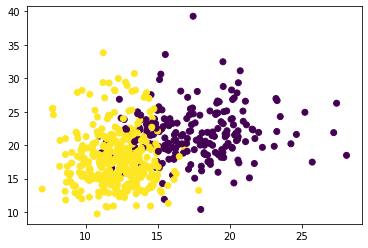

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

Usando `keras` (da `TensorFlow`) definisco una 3-layer NeuralNetwork (con *16 neuroni* per layer, **1 finale come classificatore**) e ne visualizzo la struttura

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


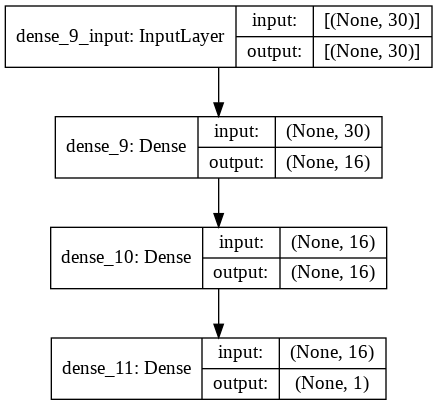

In [ ]:
model = k.Sequential([
                      k.layers.Dense(16,activation=k.activations.relu,input_shape=[30]),
                      k.layers.Dense(16,activation=k.activations.relu),
                      k.layers.Dense(1,activation=k.activations.sigmoid)
])
model.summary()
k.utils.plot_model(model,show_shapes=True)

compilo il modello

In [ ]:
model.compile(optimizer=k.optimizers.Adam(),loss=k.losses.binary_crossentropy,metrics=[k.metrics.binary_accuracy])

Distinguo tra train-set e test-set (per i test-set uso il 20% del dataset di origine)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Imposto il modello con i dati di `train`

In [ ]:
epochs = 250
model.fit(X_train,y_train,epochs=epochs)

Epoch 1/250
15/15 [==============================] - 0s 2ms/step - loss: 28.0516 - binary_accuracy: 0.4214
Epoch 2/250
15/15 [==============================] - 0s 2ms/step - loss: 3.9047 - binary_accuracy: 0.7193
Epoch 3/250
15/15 [==============================] - 0s 2ms/step - loss: 0.8383 - binary_accuracy: 0.8611
Epoch 4/250
15/15 [==============================] - 0s 2ms/step - loss: 0.5451 - binary_accuracy: 0.8917
Epoch 5/250
15/15 [==============================] - 0s 2ms/step - loss: 0.5234 - binary_accuracy: 0.9086
Epoch 6/250
15/15 [==============================] - 0s 2ms/step - loss: 0.5403 - binary_accuracy: 0.8865
Epoch 7/250
15/15 [==============================] - 0s 2ms/step - loss: 0.4080 - binary_accuracy: 0.9035
Epoch 8/250
15/15 [==============================] - 0s 2ms/step - loss: 0.4353 - binary_accuracy: 0.9170
Epoch 9/250
15/15 [==============================] - 0s 2ms/step - loss: 0.4412 - binary_accuracy: 0.8982
Epoch 10/250
15/15 [=========================

Plotto il risultato di accuratezza della rete col training set

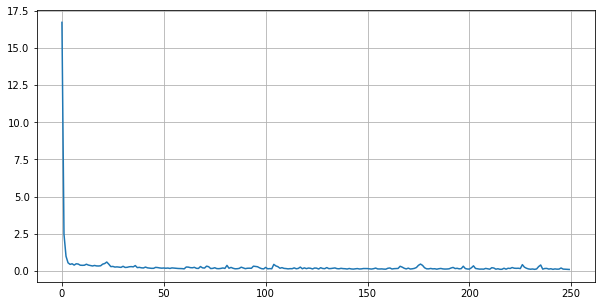

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs),model.history.history['loss'])
plt.grid(True)

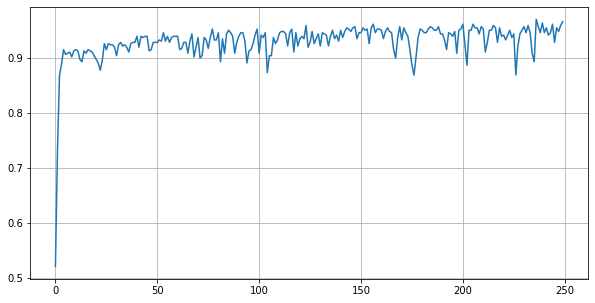

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs),model.history.history['binary_accuracy'])
plt.grid(True)

Verifico l'accuratezza delle predizioni rispetto al set di `test`

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_class = np.where(y_pred[:,0] >= 0.5, 1,0)

In [ ]:
k.metrics.binary_accuracy(y_test,y_pred_class)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9649123>